In [58]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
FS=20
matplotlib.rcParams.update({'font.size': FS}) # set font size

## Exploring results files
Lets examine the current folder to see which parameter sweeps are available.

In [59]:
folder='data_for_paper\\'
files=os.listdir(folder)
dates=set()
params=[]
for file in files:
    if ".xlsx" in file:
        dates.add(file.split('_')[-1].split('.')[0])
dates=sorted(list(dates),reverse=True)
for date in dates:
    for file in files:
        if date in file:
            startind=file.find('results_')+8
            endind=file.find('_sweep',startind)
            params.append(file[startind:endind])
            break
file_df=pd.DataFrame()
file_df['Dates']=dates
file_df['Parameter']=params
display(file_df)

,Dates,Parameter
0,20181219-095350,tmax
1,20181219-012111,num_repeats
2,20181218-170411,num_osc


The functions below will be used to create a dataframe with the data from the csv files.

In [60]:
def get_param_val_run(df):
    params=[]
    vals=[]
    runs=[]
    networks=[]
    for col in df.index:
        col=col.replace(',','=')
        tmp_list=col.split("=")
        params.append(tmp_list[0].replace(' ',''))
        vals.append(tmp_list[1].replace(' ',''))
        networks.append(tmp_list[2].split(' ')[2])
        runs.append(int(tmp_list[4].replace(' ','')))
    df['parameter']=params
    df['parameter value']=vals
    df['network']=networks
    df['run number']=runs
    df.rename(columns={0:'Validation Error'},inplace=True)
    return df

## Displaying results 
Now, we can import the data from the csv files, clean up the data types and display the last few rows in the resulting dataframes.  

In [61]:
index=0  # select the file to load by changing this variable
timestr=dates[index]
loop_parameter=params[index]
filename_suffix=str(loop_parameter) +'_sweep_'+ str(timestr)

w_df=pd.read_excel(folder+'frequency_results_'+ filename_suffix+'.xlsx',index_col=0).T
f_df=pd.read_excel(folder+'coupling_function_results_'+ filename_suffix +'.xlsx',index_col=0).T
A_df=pd.read_excel(folder+'adjacency_matrix_results_'+ filename_suffix +'.xlsx',index_col=0).T
e_df=pd.read_excel(folder+'validation_error_results_'+ filename_suffix +'.xlsx',index_col=0)
e_df=get_param_val_run(e_df.T).rename(columns={'parameter':'loop_parameter','parameter value':'parameter'})

if False: # replace False with True if you want to see them
    display(w_df.head())
    display(A_df.head())
    display(f_df.head())
    display(e_df.head())

## Extracting the best run:
Now lets select only the run with the lowest validation error

In [62]:
idx=e_df.groupby(['network','parameter'])['Validation Error'].idxmin().values
A_df=A_df.loc[idx,:].sort_values(by=['parameter','network'])
w_df=w_df.loc[idx,:].sort_values(by=['parameter','network'])
f_df=f_df.loc[idx,:].sort_values(by=['parameter','network'])
e_df=e_df.loc[idx,:].sort_values(by=['parameter','network'])
if True: # replace False with True if you want to see them
    display(w_df.head())
    display(A_df.head())
    display(f_df.head())
    display(e_df.head())

,Maximum absolute deviation,Mean absolute deviation,Maximum relative deviation (%),Mean relative deviation (%),Correlation,loop_parameter,parameter,attempt,network,method
"tmax = 2.0, network 1, run =3",0.0466537,0.0193532,58.035,11.5516,0.999152,tmax,2,3,1,euler
"tmax = 2.0, network 2, run =1",0.00545281,0.00122812,13.9122,1.66811,0.999993,tmax,2,1,2,euler
"tmax = 2.0, network 3, run =3",0.0485929,0.0145453,195.609,23.5418,0.999068,tmax,2,3,3,euler
"tmax = 2.0, network 4, run =4",0.0178438,0.00853169,9.37122,3.11005,0.999628,tmax,2,4,4,euler
"tmax = 2.0, network 5, run =4",0.0550744,0.0165701,42.3869,9.26499,0.99924,tmax,2,4,5,euler


,Number of errors,Error rate,Area under ROC curve,Best f1 score,Threshold for best f1 score,Threshold range for >90.0% of best f1 score,loop_parameter,parameter,attempt,network,method
"tmax = 2.0, network 1, run =3",4,8.88889,0.978175,0.923077,0.101523,"[0.028197058, 0.67056197]",tmax,2,3,1,euler
"tmax = 2.0, network 2, run =1",0,0,1,1,0.0735579,"[0.046759762, 0.9170407]",tmax,2,1,2,euler
"tmax = 2.0, network 3, run =3",3,6.66667,0.97619,0.933333,0.135679,"[0.07084356, 0.5049037]",tmax,2,3,3,euler
"tmax = 2.0, network 4, run =4",1,2.22222,0.995885,0.981818,0.127861,"[0.04988078, 0.6452303]",tmax,2,4,4,euler
"tmax = 2.0, network 5, run =4",2,4.44444,0.991597,0.965517,0.115496,"[0.030885337, 0.4898125]",tmax,2,4,5,euler


,Area between predicted and true coupling function,Area between true coupling function and axis,Area ratio,loop_parameter,parameter,attempt,network,method
"tmax = 2.0, network 1, run =3",1.05029,4,0.262573,tmax,2,3,1,euler
"tmax = 2.0, network 2, run =1",0.18595,4,0.0464876,tmax,2,1,2,euler
"tmax = 2.0, network 3, run =3",1.30173,4,0.325433,tmax,2,3,3,euler
"tmax = 2.0, network 4, run =4",0.73993,4,0.184983,tmax,2,4,4,euler
"tmax = 2.0, network 5, run =4",1.53023,4,0.382558,tmax,2,4,5,euler


,Validation Error,loop_parameter,parameter,network,run number
"tmax = 10.0, network 1, run =2",1.075783e-05,tmax,10.0,1,2
"tmax = 10.0, network 10, run =4",7.797739e-07,tmax,10.0,10,4
"tmax = 10.0, network 2, run =2",9.021023e-06,tmax,10.0,2,2
"tmax = 10.0, network 3, run =1",1.542774e-06,tmax,10.0,3,1
"tmax = 10.0, network 4, run =3",1.186491e-06,tmax,10.0,4,3


## Plot functions
Here we define dictionaries that can be used to use different labels in the plot than in the data frame.  You can add entries for new categories (`cat_name_dict`) and parameters (`parameter_name_dict`).

In [ ]:
import seaborn as sns
cat_name_dict={'Area ratio': 'Area ratio ($\Gamma(x)$)',#r'$\frac{\int_0^{2\pi} |\Gamma(x)-\hat{\Gamma}(x)|dx}{\int_0^{2\pi} |\Gamma(x)|dx}$'
               'Mean absolute deviation': 'Mean absolute deviation ($\omega_i$)',#r'$\langle |\omega_i-\hat{\omega}_i|\rangle_i $',
               'Error rate': 'Error rate ($A_{ij}$)',
               'Area under ROC curve': 'Area under ROC curve ($A_{ij}$)',
               'Validation Error': 'Validation error'}
parameter_name_dict={'noise_level': 'Noise standard deviation',
                     'num_osc': 'Number of oscillators',
                     'tmax': 'simulation time',
                     'num_repeats': 'number of restarts'}

The function below is used to generate the plots using a package called seaborn.

In [85]:
import seaborn as sns
def plot_results(df,cat,plot_type,xscale='linear',yscale='linear',ymin=np.nan,ymax=np.nan,figsize=(7,4)):
    fig, ax = plt.subplots(figsize=figsize)
    parameter=df['loop_parameter'][0]
    cat_name=cat_name_dict[cat]
    parameter_name=parameter_name_dict[parameter]

    ##   
    if plot_type=='cat_plot':
        order=df['parameter'].unique()
        neworder =[ int(float(x)) for x in order]
        if isinstance(order[0],str):           
            order=[x for _,x in sorted(zip(neworder,order))]
            
        tmp=sns.catplot(x='parameter',y=cat,data=df,alpha=0.5,s=5,color='black',ax=ax,order=order)
        tmp.set_xticklabels(neworder)
    ax.set_xlabel(parameter_name)
    ax.set_ylabel(cat_name)
    
    ## set scale
    if xscale=='log':
        ax.set_xscale('log')
    if yscale=='log':
        ax.set_yscale('log')
        
    ## axis limits
    if np.isnan(ymin):
        ax.set_ylim(bottom=0)
    else:
        ax.set_ylim(bottom=ymin)
    if not np.isnan(ymax):
        ax.set_ylim(top=ymax)
        
    
    fig.tight_layout()  ## set bounding box
    fig.savefig(folder+filename_suffix+'_'+cat.replace(' ','_')+'.png')
    plt.close()
    return fig
    

Now we can generate plots below.  These will be saved to file in the folder where the data was found.

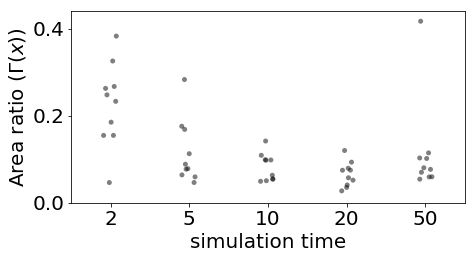

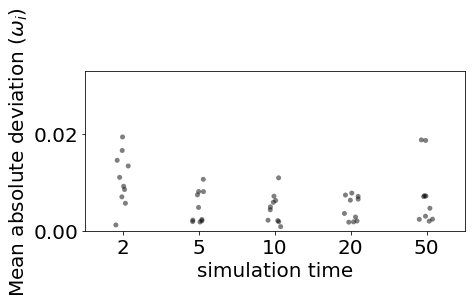

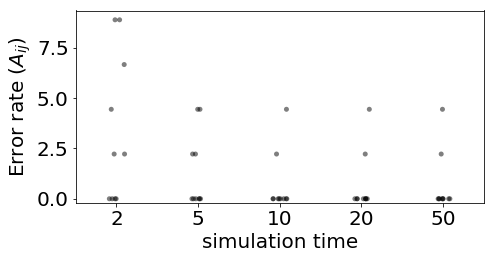

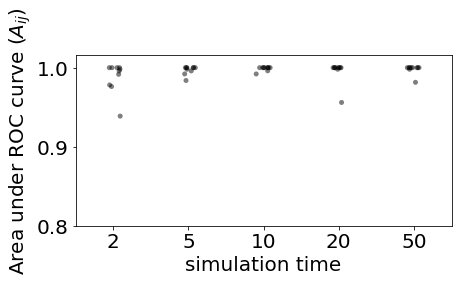

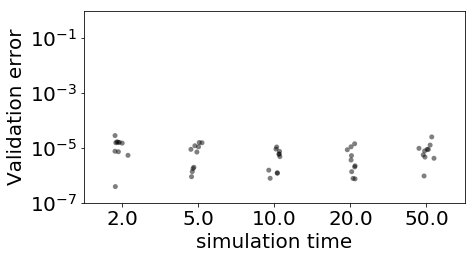

In [87]:
cat='Area ratio'
fig=plot_results(f_df,cat,plot_type='cat_plot')
cat='Mean absolute deviation'
fig=plot_results(w_df,cat,plot_type='cat_plot')
cat='Error rate'
fig=plot_results(A_df,cat,plot_type='cat_plot',ymin=-0.2)
cat='Area under ROC curve'
fig=plot_results(A_df,cat,plot_type='cat_plot',ymin=0.8)
cat='Validation Error'
fig=plot_results(e_df,cat,plot_type='cat_plot',yscale='log',ymin=0.0000001,ymax=1)